In [3]:
import matplotlib.image as mpimg
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image


In [4]:
images = "../datasets/raw/images/2005891"

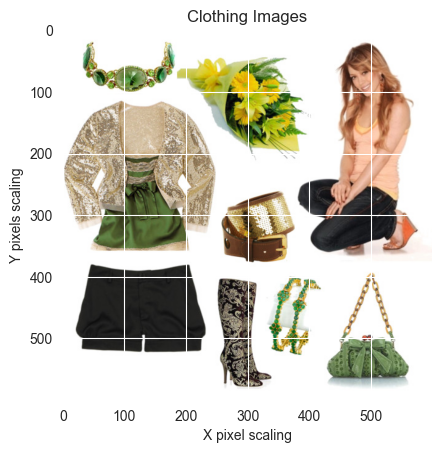

In [5]:
plt.title("Clothing Images")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
for image in range(10):
    image_path = images + "/" + str(image) + ".jpg"
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.show()
    break

In [6]:
#color_codes = get_color_codes(detected_colors[0::10]) # list splice
#color_codes = get_color_codes(detected_colors) # list splice

# PIP Package

In [7]:
with plt.cbook.get_sample_data('/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg') as image_file:
    img = plt.imread(image_file)

In [8]:
dict_bool_arrays = ce.get_bool_arrays(img)

for color in dict_bool_arrays.keys():
    plt.imsave(image_path + color + "2.png", dict_bool_arrays[color], cmap='gray')

NameError: name 'ce' is not defined

# Pylette

https://github.com/qTipTip/Pylette

In [9]:
import Pylette as pl

In [15]:
image_path_white_dress = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5845703/2.png"
image_path_white_dress_png = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5845703/2.png"
image_path_green_glitzer = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg"
image_path_green_glitzer_png = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.png"
new = "/Users/luca/Downloads/images_100x100/100099673/4.jpg"
palette_dress = pl.extract_colors(image=image_path_white_dress_png, palette_size=5, resize=False)
palette_dress = pl.extract_colors(image=new, palette_size=5, resize=False)
#palette_glitzer = pl.extract_colors(image=impage_path_green_glitzer_png, palette_size=5, resize=False)

In [17]:
palette_dress.display(save_to_file=False)
#alette_glitzer.display(save_to_file=False)

palette_dress.to_csv(filename='color_palette_dress.csv', frequency=True)
#palette_glitzer.to_csv(filename='color_palette_glitzer.csv', frequency=True)


#color = palette[0]

#print(color.rgb)
#print(color.hls)
#print(color.hsv)
#palette.display(save_to_file=False)

#print(color.rgb)
#print(color.hls)
#print(color.hsv)
#palette.display(save_to_file=False)
#palette.to_csv(filename='color_palette.csv', frequency=True)

253,254,254
63,138,223
213,74,77
107,42,41
248,213,109


# Colorgram.py

https://github.com/obskyr/colorgram.py

In [1]:
import colorgram

# Extract 6 colors from an image.
colors_dress = colorgram.extract(image_path_white_dress_png, 5)
colors_glitzer = colorgram.extract(image_path_green_glitzer_png, 5)
superman = colorgram.extract(test_img = "../datasets/bg_removed/100099673/4.png", 5)

# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
#first_color = colors[2]
#rgb = first_color.rgb # e.g. (255, 151, 210)
#hsl = first_color.hsl # e.g. (230, 255, 203)
#proportion  = first_color.proportion # e.g. 0.34
for color in superman:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')

print("White Dress")
for color in colors_dress:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')


print("Glitzer") 
for color in colors_glitzer:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')



SyntaxError: positional argument follows keyword argument (298788497.py, line 6)

# Remove white Background

Remove every white pixel in the image and replace it with a transparent pixel.

In [116]:
from PIL import Image
  
def convertImage(image_path: str):
    img = Image.open(image_path)
    img = img.convert("RGBA")
  
    datas = img.getdata()
  
    newData = []
  
    for item in datas:
        if (item[0] == 255) and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
  
    img.putdata(newData)
    img.save(image_path + "5.png", "PNG")
    print("Successful")
  
#convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg")
convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5237351/1.jpg")
convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5237351/1.jpg")
convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5237351/1.jpg")

Successful


This code does only work for white pixels. However, we sometimes also have dark backgrounds which are not necessarily black.

# RemoveBG Package

https://medium.com/@CleytonBonamigo/remove-backgrounds-of-images-with-removebg-a-python-based-command-line-tool-12c520a96bd5#:~:text=RemoveBG%20is%20a%20Python%2Dbased,library%20to%20handle%20image%20processing.

In [8]:
from rembg import remove
from PIL import Image
import sys
import os

def removebg(inputPath):
    # Get the file extension
    file_extension = os.path.splitext(inputPath)[1][1:].lower()
    #print("File Extension prüfen")
    # Validate file type
    if file_extension not in ['jpg', 'jpeg', 'png']:
        print(f"Warning: Unsupported file type '{file_extension}'. Supported file types are: jpg, jpeg, png.")
        sys.exit(1)
    
    try:
        # Open the image and remove its background
        #print("Foto öffnen...")
        originalImage = Image.open(inputPath)
        #print("Hintergrund entfernen...")
        imageWithoutBg = remove(originalImage)
        
        # Save the new image with a .png extension
        #print("Neue Datei speichern...")
        outputPath = os.path.splitext(inputPath)[0] + '.png'
        imageWithoutBg.save(outputPath)
        
        print("Background removed successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)



    # Run the removebg function
#removebg(image_path_white_dress)
#removebg("/Users/luca/Desktop/Resized256/14.jpg")
#removebg("/Users/luca/Desktop/Resized256/1.jpg")
#removebg("/Users/luca/Desktop/Resized256/2.jpg")

In [19]:
import backgroundremover as br

from backgroundremover.bg import remove
def remove_bg(src_img_path, out_img_path):
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    f = open(src_img_path, "rb")
    data = f.read()
    img = remove(data, model_name=model_choices[0],
                 alpha_matting=True,
                 alpha_matting_foreground_threshold=240,
                 alpha_matting_background_threshold=10,
                 alpha_matting_erode_structure_size=10,
                 alpha_matting_base_size=1000)
    f.close()
    f = open(out_img_path, "wb")
    f.write(img)
    f.close()
    
remove_bg("/Users/luca/Desktop/Test_Different Shapes/2_256x256.jpg", "/Users/luca/Desktop/Test_Different Shapes/Sub")
remove_bg("/Users/luca/Desktop/Test_Different Shapes/1_256x256.jpg", "/Users/luca/Desktop/Test_Different Shapes/Sub")

RuntimeError: No ffmpeg exe could be found. Install ffmpeg on your system, or set the IMAGEIO_FFMPEG_EXE environment variable.

In [21]:
from rembg import remove
import cv2

input_path = '/Users/luca/Desktop/Test_Different Shapes/2_256x256.jpg'
path2 = '/Users/luca/Desktop/Test_Different Shapes/1_256x256.jpg'
output_path = '/Users/luca/Desktop/Test_Different Shapes/Sub/2.png'


input = cv2.imread(path2)
output = remove(input)
cv2.imwrite(output_path, output)

True

In [16]:
img1 = "/Users/luca/Desktop/Resized256/14.png"
img2 = "/Users/luca/Desktop/Resized256/1.png"
img3 = "/Users/luca/Desktop/Resized256/2.png"

import colorgram

# Extract 6 colors from an image.
color_img1 = colorgram.extract(img1, 5)
color_img2 = colorgram.extract(img2, 5)
color_img3 = colorgram.extract(img3, 5)


print("IMG1")
for color in color_img1:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')

print("IMG2")
for color in color_img2:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')

print("IMG3")   
for color in color_img3:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')
    

IMG1
RGB: Rgb(r=0, g=0, b=0), Proportion: 0.7286882117183027
RGB: Rgb(r=19, g=18, b=30), Proportion: 0.12998600419874037
RGB: Rgb(r=213, g=210, b=205), Proportion: 0.09666645460907182
RGB: Rgb(r=177, g=172, b=162), Proportion: 0.03505312042750811
RGB: Rgb(r=99, g=96, b=92), Proportion: 0.009606209046376995
IMG2
RGB: Rgb(r=1, g=0, b=0), Proportion: 0.6193053676138927
RGB: Rgb(r=135, g=97, b=51), Proportion: 0.14044075004832784
RGB: Rgb(r=170, g=171, b=118), Proportion: 0.12283330111476255
RGB: Rgb(r=148, g=147, b=69), Proportion: 0.09643018235711064
RGB: Rgb(r=205, g=209, b=189), Proportion: 0.02099039886590631
IMG3
RGB: Rgb(r=7, g=6, b=4), Proportion: 0.5469365846177441
RGB: Rgb(r=216, g=214, b=209), Proportion: 0.304470516064719
RGB: Rgb(r=107, g=96, b=78), Proportion: 0.08468675715052526
RGB: Rgb(r=168, g=165, b=159), Proportion: 0.059013879303734376
RGB: Rgb(r=81, g=65, b=39), Proportion: 0.004892262863277356


In [2]:
import Pylette as pl

pl_img1 = pl.extract_colors(image="../datasets/bg_removed/100099673/4.png", palette_size=5, resize=False)
pl_img2 = pl.extract_colors(image="../datasets/bg_removed/100205676/3.png", palette_size=5, resize=False)

pl_img1.display(save_to_file=False)
pl_img2.display(save_to_file=False)


pl_img1.to_csv(filename='color_palette_igm1.csv', frequency=True)
pl_img2.to_csv(filename='color_palette_igm1.csv', frequency=True)


0,0,0
64,148,241
53,124,206
232,105,77
91,49,50
0,0,0
38,36,43
59,57,61
91,90,92
204,191,184


In [19]:
from PIL import Image
im = Image.open(img2)
maximum = 0
mostFrequentColor = None
print(im.getcolors())
for number, color in im.getcolors():
    if number > maximum:
        maximum = number
        mostFrequentColor = color
print(mostFrequentColor) # (255, 0, 0)

None


TypeError: 'NoneType' object is not iterable

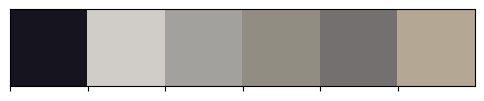

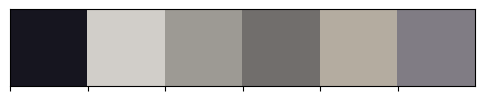

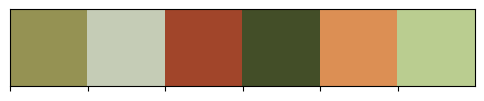

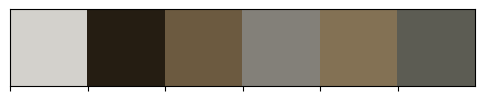

In [34]:
from colorthief import ColorThief
"""
        :param quality: quality settings, 1 is the highest quality, the bigger
                        the number, the faster the palette generation, but the
                        greater the likelihood that colors will be missed.
                        """

color_thief1 = ColorThief(img1)
color_thief2 = ColorThief(img2)
color_thief3 = ColorThief(img3)

palette1 = color_thief1.get_palette(color_count=6, quality=1)
palette1_1 = color_thief1.get_palette(color_count=6, quality=10)

palette2 = color_thief2.get_palette(color_count=6, quality=1)
palette3 = color_thief3.get_palette(color_count=6, quality=1)

sns.palplot([tuple(i / 255 for i in j) for j in palette1])
sns.palplot([tuple(i / 255 for i in j) for j in palette1_1])

sns.palplot([tuple(i / 255 for i in j) for j in palette2])
sns.palplot([tuple(i / 255 for i in j) for j in palette3])


(149, 147, 84)
[(146, 146, 83), (197, 204, 182), (210, 128, 70), (161, 68, 42), (71, 81, 41), (179, 198, 140)]


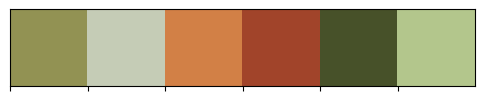

In [28]:
print(dominant_color)
print(palette)
sns.palplot([tuple(i / 255 for i in j) for j in palette])

# Measure speed of Backround removal

In [15]:
import time
from PIL import Image

one_100 = "/Users/luca/Desktop/Test_Different Shapes/1_100x100.jpg"
one_default = "/Users/luca/Desktop/Test_Different Shapes/1_100x100.jpg"
one_256 = "/Users/luca/Desktop/Test_Different Shapes/1_256x256.jpg"



two_100 = "/Users/luca/Desktop/Test_Different Shapes/2_100x100.jpg"
two_default = "/Users/luca/Desktop/Test_Different Shapes/2_100x100.jpg"
two_256 = "/Users/luca/Desktop/Test_Different Shapes/2_256x256.jpg"


#Resize to 50x50
one_100 = Image.open(one_100)
two_100 = Image.open(two_100)

one_50 = one_100.resize((50, 50))
two_50 = two_100.resize((50, 50))

#save image
one_50.save("/Users/luca/Desktop/Test_Different Shapes/1_50x50.jpg")
two_50.save("/Users/luca/Desktop/Test_Different Shapes/2_50x50.jpg")

one_50.close()
two_50.close()

one_50 = "/Users/luca/Desktop/Test_Different Shapes/1_50x50.jpg"
two_50 = "/Users/luca/Desktop/Test_Different Shapes/2_50x50.jpg"

In [17]:

pic_list = [one_default, one_256, one_50, two_default, two_256, two_50]
def stop_time(image_path):
    start = time.time()
    print(image_path)
    removebg(image_path)
    end = time.time()
    print("Time taken in seconds: ", end - start , "     for ", image_path)
    

for pic in pic_list:
    stop_time(pic)


/Users/luca/Desktop/Test_Different Shapes/1_100x100.jpg
Background removed successfully.
Time taken in seconds:  8.291918992996216      for  /Users/luca/Desktop/Test_Different Shapes/1_100x100.jpg
/Users/luca/Desktop/Test_Different Shapes/1_256x256.jpg
Background removed successfully.
Time taken in seconds:  8.102901935577393      for  /Users/luca/Desktop/Test_Different Shapes/1_256x256.jpg
/Users/luca/Desktop/Test_Different Shapes/1_50x50.jpg
Background removed successfully.
Time taken in seconds:  8.041669845581055      for  /Users/luca/Desktop/Test_Different Shapes/1_50x50.jpg
/Users/luca/Desktop/Test_Different Shapes/2_100x100.jpg
Background removed successfully.
Time taken in seconds:  7.982784986495972      for  /Users/luca/Desktop/Test_Different Shapes/2_100x100.jpg
/Users/luca/Desktop/Test_Different Shapes/2_256x256.jpg
Background removed successfully.
Time taken in seconds:  8.05068325996399      for  /Users/luca/Desktop/Test_Different Shapes/2_256x256.jpg
/Users/luca/Desktop/

In [ ]:
test_img = "../datasets/bg_removed/100099673/4.png"
